**Atualizando a biblioteca para plotagem de gráficos**


In [138]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [140]:
base = pd.read_csv('../Dados/train.csv', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [141]:
#base2 = pd.read_csv('../Dados/train.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [142]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [143]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [144]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [145]:
np.unique(base['Survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

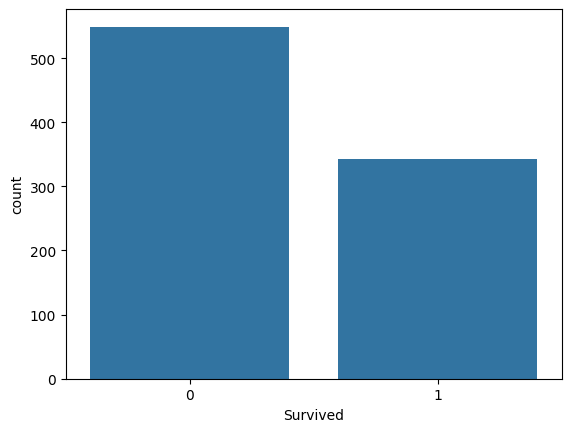

In [146]:
sns.countplot(x = base['Survived']);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
from sklearn.preprocessing import LabelEncoder

# copia base
dados = base.copy()

# trata nulos (sem inplace, atribuindo direto)
dados['Age'] = dados['Age'].fillna(dados['Age'].median())
dados['Embarked'] = dados['Embarked'].fillna(dados['Embarked'].mode()[0])

# aplica label encoder só nas colunas categóricas
le_sex = LabelEncoder()
dados['Sex'] = le_sex.fit_transform(dados['Sex'])

le_embarked = LabelEncoder()
dados['Embarked'] = le_embarked.fit_transform(dados['Embarked'])


In [149]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [150]:
# Sexo (duas categorias: male/female)
print(base['Sex'].unique(), len(base['Sex'].unique()))

# Porto de embarque (C/Q/S)
print(base['Embarked'].unique(), len(base['Embarked'].unique()))

# Classe do bilhete (1ª, 2ª, 3ª)
print(base['Pclass'].unique(), len(base['Pclass'].unique()))


['male' 'female'] 2
['S' 'C' 'Q' nan] 4
[3 1 2] 3


In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [152]:
from sklearn.preprocessing import OneHotEncoder

cols_onehot = ['Embarked']   # colunas categóricas sem ordem
onehot = OneHotEncoder(sparse_output=False)

df_onehot = onehot.fit_transform(base[cols_onehot])
nomes_cols = onehot.get_feature_names_out(cols_onehot)

df_onehot = pd.DataFrame(df_onehot, columns=nomes_cols)

# junta com o resto
base_encoded = pd.concat([base.drop(columns=cols_onehot), df_onehot], axis=1)


In [153]:
base_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0,0.0,0.0,0.0


In [154]:
base_encoded.shape

(891, 15)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [155]:
# seleciona só as colunas que interessam
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_prev = dados[features].copy()     # usa o DataFrame tratado (sem nulos e com encodes)
y_classe = dados['Survived'].copy()

Acurácia: 0.770949720670391

Relatório de classificação:
               precision    recall  f1-score   support

      Morreu       0.81      0.79      0.80       105
  Sobreviveu       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



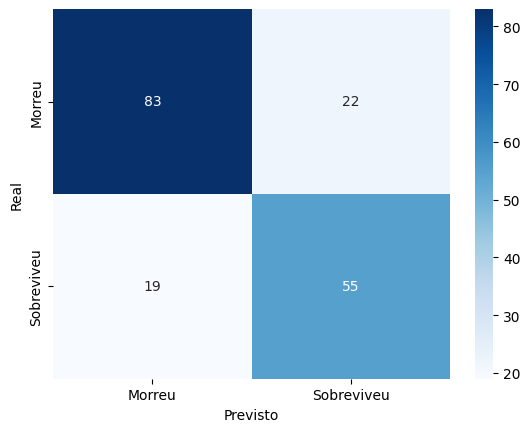

In [156]:
# Split
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_prev, y_classe, test_size=0.2, random_state=42
)

# Treino
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo.fit(X_treino, y_treino)

# Avaliação no conjunto de teste
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_teste)

print("Acurácia:", accuracy_score(y_teste, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_teste, y_pred, target_names=['Morreu','Sobreviveu']))

cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Morreu','Sobreviveu'],
            yticklabels=['Morreu','Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


Acurácia: 0.776536312849162
              precision    recall  f1-score   support

      Morreu       0.77      0.92      0.83       110
  Sobreviveu       0.81      0.55      0.66        69

    accuracy                           0.78       179
   macro avg       0.79      0.73      0.74       179
weighted avg       0.78      0.78      0.77       179



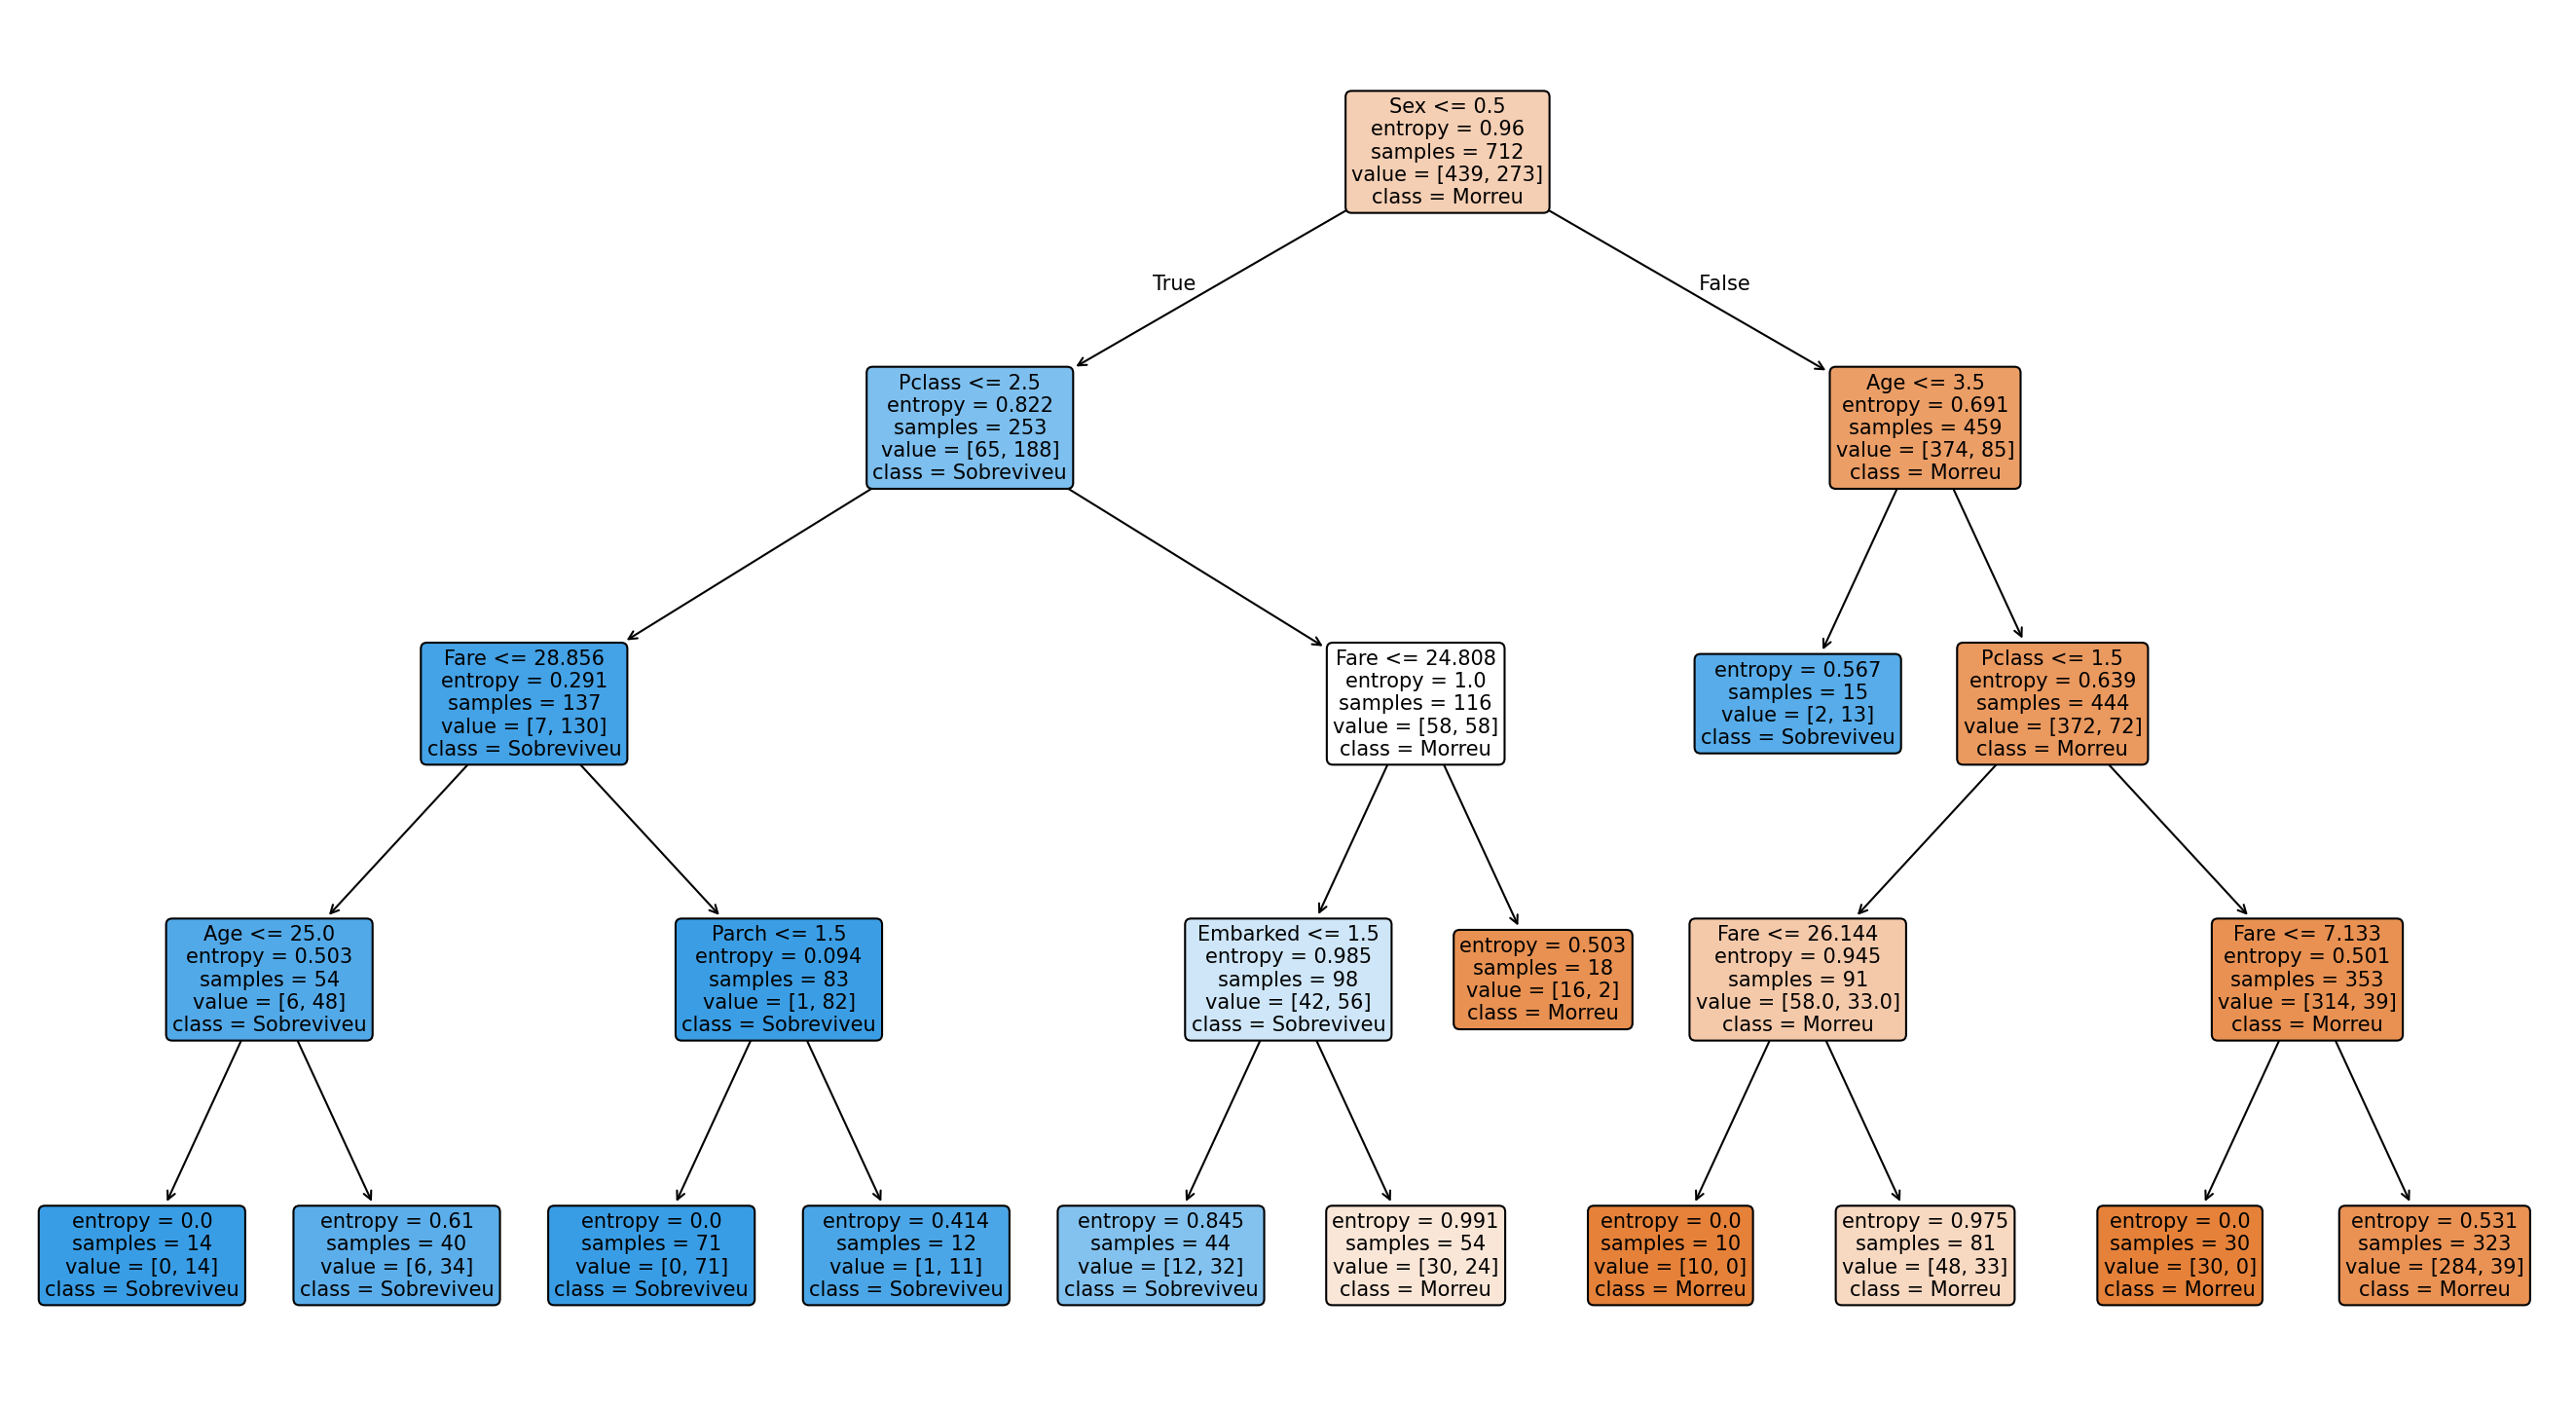

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Age <= 25.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  25.00
|   |   |   |   |--- class: 1
|   |   |--- Fare >  28.86
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 24.81
|   |   |   |--- Embarked <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Embarked >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Fare >  24.81
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Age <= 3.50
|   |   |--- class: 1
|   |--- Age >  3.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Fare <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  26.14
|   |   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- Fare <= 7.13
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  7.13
|   |   |   |   |--- class: 0

OK: submission.csv gerado


In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ==============================
# 1) Carregar TRAIN e preparar
# ==============================
train = pd.read_csv("../Dados/train.csv")

# features escolhidas
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = 'Survived'

# estatísticas do TREINO (usar também no test.csv)
age_med   = train['Age'].median()
fare_med  = train['Fare'].median()
emb_mode  = train['Embarked'].mode()[0]

# copiar e tratar nulos
dados = train[features + [target]].copy()
dados['Age']      = dados['Age'].fillna(age_med)
dados['Fare']     = dados['Fare'].fillna(fare_med)
dados['Embarked'] = dados['Embarked'].fillna(emb_mode)

# encodes fixos (iguais no train e test)
sex_map = {'female': 0, 'male': 1}
emb_map = {'C': 0, 'Q': 1, 'S': 2}
dados['Sex']      = dados['Sex'].map(sex_map).astype(int)
dados['Embarked'] = dados['Embarked'].map(emb_map).astype(int)

# separar X/Y
X = dados[features].copy()
y = dados[target].astype(int).copy()

# ==============================
# 2) Split, treino e avaliação
# ==============================
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,        # deixa legível
    min_samples_leaf=10,
    random_state=42
).fit(X_treino, y_treino)

# avaliação rápida
y_pred = modelo.predict(X_teste)
print("Acurácia:", accuracy_score(y_teste, y_pred))
print(classification_report(y_teste, y_pred, target_names=['Morreu','Sobreviveu']))

# (opcional) ver árvore e regras
plt.figure(figsize=(18,10), dpi=150)
plot_tree(modelo, feature_names=X_treino.columns,
          class_names=['Morreu','Sobreviveu'],
          filled=True, rounded=True, fontsize=10)
plt.tight_layout(pad=2)
plt.show()

print(export_text(modelo, feature_names=list(X_treino.columns), max_depth=4))

# ==============================
# 3) Carregar TEST e gerar submissão
# ==============================
test = pd.read_csv("../Dados/test.csv")

X_test_final = test[features].copy()
X_test_final['Age']      = X_test_final['Age'].fillna(age_med)
X_test_final['Fare']     = X_test_final['Fare'].fillna(fare_med)
X_test_final['Embarked'] = X_test_final['Embarked'].fillna(emb_mode)

X_test_final['Sex']      = X_test_final['Sex'].map(sex_map).astype(int)
X_test_final['Embarked'] = X_test_final['Embarked'].map(emb_map).astype(int)

# sanity checks
assert list(X_test_final.columns) == list(X_treino.columns)
assert X_test_final.isna().sum().sum() == 0

pred_kaggle = modelo.predict(X_test_final)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred_kaggle
})
submission.to_csv('submission.csv', index=False)
print("OK: submission.csv gerado")


**Método de amostragem Holdout**

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_prev

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [159]:
y_classe

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [160]:
y_classe.shape

(891,)

In [161]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [162]:
X_treino.shape

(712, 7)

In [163]:
X_teste.shape

(179, 7)

In [164]:
X_teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [165]:
y_treino

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [166]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [167]:
import pickle

In [168]:
with open('../Dados/titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)